In [1]:
!pip install tldextract
!pip install tld

import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt

from urllib.parse import urlparse #module của thư viện urllib, được sử dụng để phân tích các thành phần của URL như scheme, netloc, path, params, query, và fragment
import tldextract #trích xuất các thành phần của một URL, bao gồm tên miền, tên miền cấp cao nhất (TLD), và tên miền phụ
import re #hỗ trợ cho các biểu thức chính quy (regular expressions)
from tld import get_tld
import string
import requests
import textwrap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 7.1 MB/s eta 0:00:00


In [2]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount = True)

In [3]:
# Google colab
# data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/URL_DETECTION/URL_Feature_Extraction.csv')
# data

In [4]:
# Kaggle
!pip install gdown

In [5]:
!gdown --id 1jRqud9iXllhkg4WeyroGHDSkAyUF4glA

/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1jRqud9iXllhkg4WeyroGHDSkAyUF4glA
To: /kaggle/working/URL_Feature.csv
100%|██████████████████████████████████████| 21.1M/21.1M [00:00<00:00, 91.6MB/s]


In [6]:
!gdown --id 1SBJ6D9HoV6oT6ndHidowyFZkp1hpAnwm

/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1SBJ6D9HoV6oT6ndHidowyFZkp1hpAnwm
To: /kaggle/working/top-1m.csv
100%|███████████████████████████████████████| 22.2M/22.2M [00:00<00:00, 168MB/s]


In [7]:
alexa = pd.read_csv("/kaggle/working/top-1m.csv", header=None, names=['rank', 'domain'])
alexa

,rank,domain
0,1,google.com
1,2,youtube.com
2,3,facebook.com
3,4,baidu.com
4,5,wikipedia.org
...,...,...
999995,999996,sibf.org
999996,999997,bukapintu.co
999997,999998,klatovynet.cz
999998,999999,elconquistadorfm.cl


In [8]:
data = pd.read_csv('/kaggle/working/URL_Feature.csv')
data

,label,AtSymbol,DomainInPaths,DomainInSubdomains,DoubleSlashInPath,EntropyDomainName,HostnameLength,IpAddress,NumAmpersand,NumDash,...,NumUnderscore,PathLength,PathLevel,QueryLength,SubDomainLevel,SusTlds,TildeSymbol,UrlLength,UseShortService,rank_host
0,1,0,0,0,0,3.503998,22,0,0,0,...,0,0,0,0,2,1,0,29,0,0
1,1,0,0,0,0,4.137538,28,0,0,0,...,0,1,2,0,2,0,0,36,0,1
2,1,0,0,0,0,3.323231,15,0,0,0,...,0,1,2,0,1,0,0,24,0,0
3,1,0,0,0,0,3.327820,16,0,1,1,...,0,5,3,68,1,0,0,97,0,1
4,0,0,0,0,0,3.454987,24,0,0,0,...,1,73,8,0,1,0,0,105,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288153,1,0,0,0,0,2.923231,15,0,0,0,...,0,8,2,0,0,1,0,31,0,1
288154,0,0,0,0,0,2.663533,11,0,0,8,...,0,86,8,0,1,1,0,105,0,0
288155,0,0,0,0,0,3.681881,19,0,0,0,...,0,0,0,0,1,0,0,27,0,1
288156,1,0,0,0,0,3.796218,26,0,0,0,...,0,0,0,0,2,0,0,33,0,1


In [9]:
X = data.drop(['label'], axis=1) 
Y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 101)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((230526, 26), (230526,), (57632, 26), (57632,))

In [10]:
X_train

,AtSymbol,DomainInPaths,DomainInSubdomains,DoubleSlashInPath,EntropyDomainName,HostnameLength,IpAddress,NumAmpersand,NumDash,NumDashInHostname,...,NumUnderscore,PathLength,PathLevel,QueryLength,SubDomainLevel,SusTlds,TildeSymbol,UrlLength,UseShortService,rank_host
626,0,0,0,0,3.084963,12,0,0,1,1,...,0,20,5,0,0,1,0,39,0,0
122095,0,0,0,0,2.923231,15,0,0,0,0,...,0,17,4,0,0,0,0,39,0,1
92786,0,0,0,0,3.323231,15,0,0,3,0,...,0,55,2,0,1,0,0,78,0,0
176343,0,1,0,0,3.681881,19,0,0,2,0,...,3,96,9,29,0,0,0,152,0,1
1391,0,0,0,0,3.689892,27,0,0,1,0,...,0,1,2,0,2,0,0,35,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55293,0,0,0,0,3.326360,19,0,0,0,0,...,0,20,4,0,1,0,0,47,1,1
136767,0,0,0,0,3.646439,20,0,0,2,0,...,0,35,7,0,1,0,0,63,0,0
204614,0,0,0,0,3.572431,18,0,0,0,0,...,3,36,5,0,1,0,0,62,0,0
214539,0,0,0,0,2.913977,11,0,0,0,0,...,1,16,3,0,0,0,0,34,0,1


In [11]:
ML_model = []
ML_top3_model_tuning = []

class ModelPerformance:
    def __init__(self, name, acc_train, acc_tests, f1_score, recall_score, precision_score):
        self.name = name
        self.acc_train = round(acc_train, 3)
        self.acc_tests = round(acc_tests, 3)
        self.f1_score = round(f1_score, 3)
        self.recall_score = round(recall_score, 3)
        self.precision_score = round(precision_score, 3)

def sort_models(models):
    return sorted(models, key=lambda x: (-x.acc_tests, -x.f1_score, -x.recall_score, -x.precision_score))

def storeResults(name, a, b, c, d, e, array):
    if array == 0:
        ML_model.append(ModelPerformance(name, a, b, c, d, e))
    else:
        ML_top3_model_tuning.append(ModelPerformance(name, a, b, c, d, e))

# Decision Tree


In [12]:
# Tạo một đối tượng DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

DTC_model = DecisionTreeClassifier(random_state = 100, 
                                   criterion = "entropy")

# Hiển thị tất cả các tham số của mô hình
params = DTC_model.get_params()
params_str = ', '.join(f'{k}={v}' for k, v in params.items())

# Định dạng chuỗi để nó tự động ngắt dòng khi vượt quá độ rộng cố định
print(textwrap.fill(params_str, width=70))

ccp_alpha=0.0, class_weight=None, criterion=entropy, max_depth=None,
max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0,
min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0,
random_state=100, splitter=best


In [13]:
DTC_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)


--------------- DECISION TREE ---------------

BÁO CÁO PHÂN LOẠI:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92     28812
           1       0.92      0.91      0.91     28820

    accuracy                           0.91     57632
   macro avg       0.92      0.91      0.91     57632
weighted avg       0.92      0.91      0.91     57632


MA TRẬN NHẦM LẪN:
Train Accuracy:  0.9936059273140557
Test Accuracy:  0.9149604386451972
F1 Score:  0.914346633111379
Recall:  0.9076682859125608
Precision:  0.9211239832388465


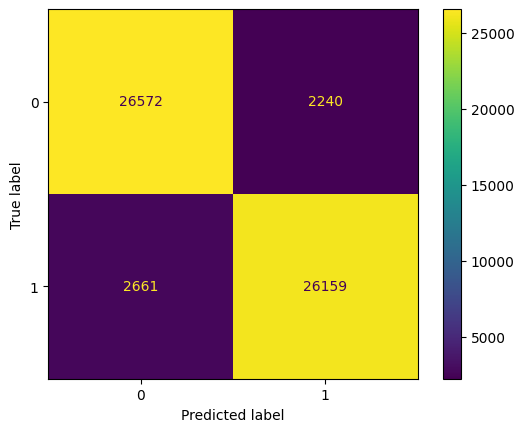

In [14]:
# Sử dụng mô hình đã huấn luyện để đưa ra dự đoán trên tập kiểm tra.
pred_DT_test = DTC_model.predict(X_test)

# Sử dụng mô hình đã huấn luyện để đưa ra dự đoán trên tập huấn luyện.
pred_DT_train = DTC_model.predict(X_train)

print('\n--------------- DECISION TREE ---------------\n')
print('BÁO CÁO PHÂN LOẠI:\n', classification_report(y_test, pred_DT_test, target_names=['0','1']))

# Tạo đối tượng biểu diễn ma trận nhầm lẫn.
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, pred_DT_test),display_labels=['0','1'])
print('\nMA TRẬN NHẦM LẪN:\n',disp.plot())

acc_train = accuracy_score(y_train,pred_DT_train)
acc_test = accuracy_score(y_test,pred_DT_test)
f1 = f1_score(y_test,pred_DT_test)
recall = recall_score(y_test,pred_DT_test)
precision = precision_score(y_test,pred_DT_test)

print("Train Accuracy: ", acc_train)
print("Test Accuracy: ", acc_test)
print("F1 Score: ", f1)
print("Recall: ", recall)
print("Precision: ", precision)

In [15]:
storeResults('Decision Tree', acc_train, acc_test, f1, recall, precision, 0)

## Hyperparameter Tuning

In [16]:
# the number of features to be considered when looking for the best split in the decision tree
max_features = [None, 'sqrt', 'log2']

# the required minimal amount of samples to be present at a leaf node.
min_samples_leaf = [1, 2, 4]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# maximum depth to which the decision tree is allowed to grow.
max_depth = [None, 10, 20, 30]

param_grid = {
    'min_samples_leaf': min_samples_leaf, 
    'max_features': max_features, 
    'max_depth': max_depth,
    'min_samples_split': min_samples_split, 
}

# cv : 3-fold cross validation
# verbose: Controls the verbosity: the higher, the more messages.
grid = GridSearchCV(DecisionTreeClassifier(random_state = 100, criterion = 'entropy'), param_grid = param_grid, cv = 3,scoring = "accuracy", verbose = 1, n_jobs = -1, return_train_score=True)

In [17]:
# Huấn luyện mô hình với Grid Search.
grid.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [18]:
grid.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 10}

In [19]:
DTC_grid = DecisionTreeClassifier(random_state = 100, 
                                   criterion = "entropy",
                                     max_depth = None,
                                     max_features = None,
                                     min_samples_leaf = 2,
                                     min_samples_split = 10
                                 )

In [20]:
DTC_grid.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=10, random_state=100)


--------------- DECISION TREE AFTER TUNING ---------------

BÁO CÁO PHÂN LOẠI:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92     28812
           1       0.93      0.90      0.92     28820

    accuracy                           0.92     57632
   macro avg       0.92      0.92      0.92     57632
weighted avg       0.92      0.92      0.92     57632


MA TRẬN NHẦM LẪN:
Train Accuracy:  0.9655136513885636
Test Accuracy:  0.9167649916712938
F1 Score:  0.9155294159080103
Recall:  0.9020124913254685
Precision:  0.9294576137866924


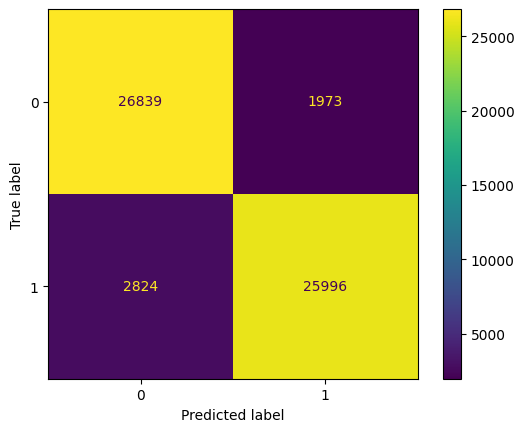

In [21]:
pred_DT_test = DTC_grid.predict(X_test)

pred_DT_train = DTC_grid.predict(X_train)

print('\n--------------- DECISION TREE AFTER TUNING ---------------\n')
print('BÁO CÁO PHÂN LOẠI:\n', classification_report(y_test, pred_DT_test, target_names=['0','1']))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, pred_DT_test),display_labels=['0','1'])
print('\nMA TRẬN NHẦM LẪN:\n',disp.plot())

acc_train = accuracy_score(y_train,pred_DT_train)
acc_test = accuracy_score(y_test,pred_DT_test)
f1 = f1_score(y_test,pred_DT_test)
recall = recall_score(y_test,pred_DT_test)
precision = precision_score(y_test,pred_DT_test)

print("Train Accuracy: ", acc_train)
print("Test Accuracy: ", acc_test)
print("F1 Score: ", f1)
print("Recall: ", recall)
print("Precision: ", precision)

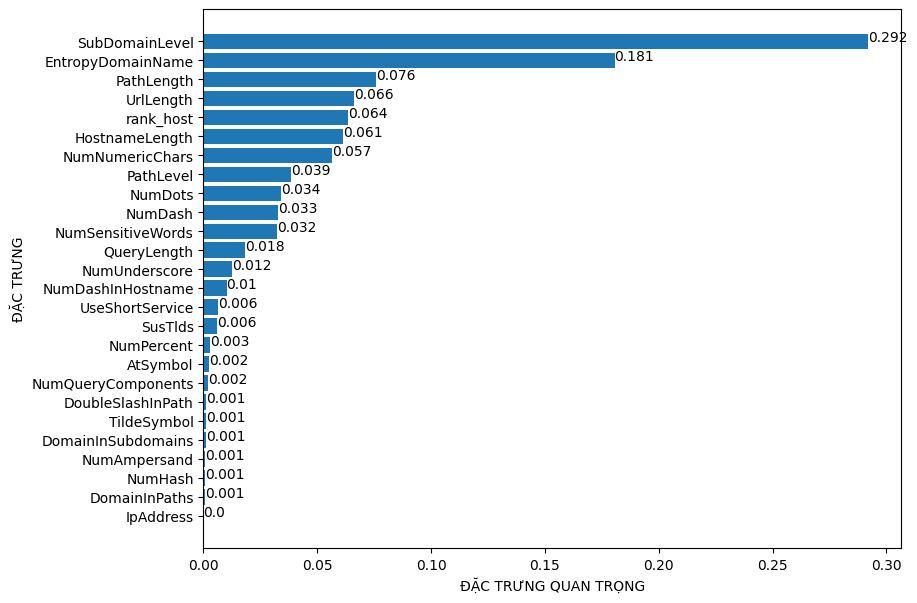

In [22]:
# Lấy tầm quan trọng của các đặc trưng từ mô hình cây quyết định đã được huấn luyện.
importances = DTC_grid.feature_importances_

# Sắp xếp các đặc trưng theo tầm quan trọng giảm dần.
indices = np.argsort(importances)

plt.figure(figsize = (9, 7)) # Rộng: 9, Cao: 7

# Lấy số lượng đặc trưng trong tập huấn luyện.
n_features = X_train.shape[1]

# Tạo biểu đồ.
plt.barh(range(n_features), importances[indices], align = 'center')

# Đặt nhãn cho trục y bằng tên các đặc trưng được sắp xếp theo tầm quan trọng.
plt.yticks(np.arange(n_features), X_train.columns[indices])
for index, value in enumerate(importances[indices]):
    plt.text(value, index, str(round(value,3)))
plt.xlabel("ĐẶC TRƯNG QUAN TRỌNG")
plt.ylabel("ĐẶC TRƯNG")
plt.show()

In [23]:
storeResults('Decision Tree', acc_train, acc_test, f1, recall, precision, 1)

# Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

RFC_model = RandomForestClassifier(random_state = 100,
                                   criterion = "entropy"
                                  ) 

params = RFC_model.get_params()
params_str = ', '.join(f'{k}={v}' for k, v in params.items())

print(textwrap.fill(params_str, width=70))

bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion=entropy,
max_depth=None, max_features=sqrt, max_leaf_nodes=None,
max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1,
min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100,
n_jobs=None, oob_score=False, random_state=100, verbose=0,
warm_start=False


In [25]:
RFC_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=100)


--------------- RANDOM FOREST ---------------

BÁO CÁO PHÂN LOẠI:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93     28812
           1       0.95      0.92      0.93     28820

    accuracy                           0.93     57632
   macro avg       0.93      0.93      0.93     57632
weighted avg       0.93      0.93      0.93     57632


MA TRẬN NHẦM LẪN:
Train Accuracy:  0.9935972515030842
Test Accuracy:  0.9335438645197113
F1 Score:  0.9326131325216412
Recall:  0.9196044413601665
Precision:  0.945995145631068


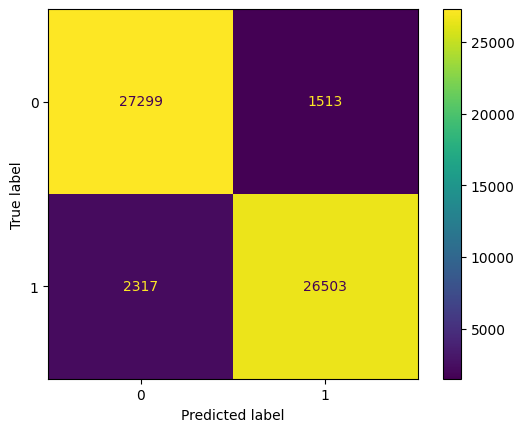

In [26]:
pred_RF_test = RFC_model.predict(X_test)

pred_RF_train = RFC_model.predict(X_train)

print('\n--------------- RANDOM FOREST ---------------\n')
print('BÁO CÁO PHÂN LOẠI:\n', classification_report(y_test, pred_RF_test, target_names=['0','1']))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, pred_RF_test),display_labels=['0','1'])
print('\nMA TRẬN NHẦM LẪN:\n',disp.plot())

acc_train = accuracy_score(y_train,pred_RF_train)
acc_test = accuracy_score(y_test,pred_RF_test)
f1 = f1_score(y_test,pred_RF_test)
recall = recall_score(y_test,pred_RF_test)
precision = precision_score(y_test,pred_RF_test)

print("Train Accuracy: ", acc_train)
print("Test Accuracy: ", acc_test)
print("F1 Score: ", f1)
print("Recall: ", recall)
print("Precision: ", precision)

In [27]:
storeResults('Random Forest', acc_train, acc_test, f1, recall, precision, 0)

## Hyperparameter tuning

In [28]:
# the number of trees to be used
n_estimators = [50, 100, 200]

# a count to select the maximum features in each tree
max_features = ['sqrt', 'log2']

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# maximum number of splits each tree can take.
max_depth = [None, 10, 20, 30]

param_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features, 
    'max_depth': max_depth,
    'min_samples_split': min_samples_split, 
}

# cv : 3-fold cross validation
# verbose: Controls the verbosity: the higher, the more messages.
grid = GridSearchCV(RandomForestClassifier(random_state = 100, criterion = 'entropy'), param_grid = param_grid, cv = 3,scoring = "accuracy", verbose = 1, n_jobs = -1, return_train_score=True)

In [29]:
# Huấn luyện mô hình với Grid Search.
grid.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [30]:
grid.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_split': 5,
 'n_estimators': 200}

In [31]:
RFC_grid = RandomForestClassifier(random_state = 100, 
                                   max_depth = None, 
                                   max_features = 'sqrt', 
                                   min_samples_split = 5, 
                                   n_estimators = 200,
                                   criterion = "entropy"
                                  ) 

In [32]:
RFC_grid.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_split=5,
                       n_estimators=200, random_state=100)


--------------- RANDOM FOREST AFTER TUNING ---------------

BÁO CÁO PHÂN LOẠI:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94     28812
           1       0.95      0.92      0.93     28820

    accuracy                           0.94     57632
   macro avg       0.94      0.94      0.94     57632
weighted avg       0.94      0.94      0.94     57632


MA TRẬN NHẦM LẪN:
Train Accuracy:  0.9849821712084537
Test Accuracy:  0.9355045807884509
F1 Score:  0.934593253444544
Recall:  0.9214434420541291
Precision:  0.948123817344425


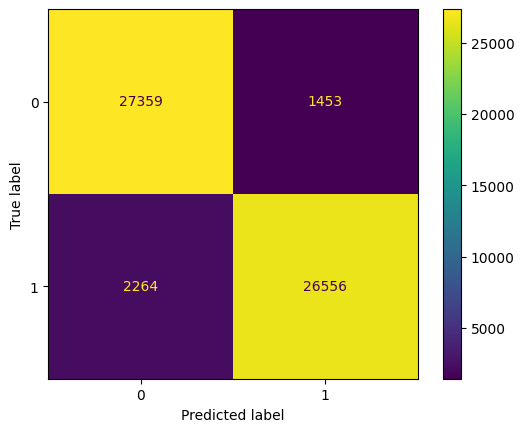

In [33]:
pred_RF_test = RFC_grid.predict(X_test)

pred_RF_train = RFC_grid.predict(X_train)

print('\n--------------- RANDOM FOREST AFTER TUNING ---------------\n')
print('BÁO CÁO PHÂN LOẠI:\n', classification_report(y_test, pred_RF_test, target_names=['0','1']))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, pred_RF_test),display_labels=['0','1'])
print('\nMA TRẬN NHẦM LẪN:\n',disp.plot())

acc_train = accuracy_score(y_train,pred_RF_train)
acc_test = accuracy_score(y_test,pred_RF_test)
f1 = f1_score(y_test,pred_RF_test)
recall = recall_score(y_test,pred_RF_test)
precision = precision_score(y_test,pred_RF_test)

print("Train Accuracy: ", acc_train)
print("Test Accuracy: ", acc_test)
print("F1 Score: ", f1)
print("Recall: ", recall)
print("Precision: ", precision)

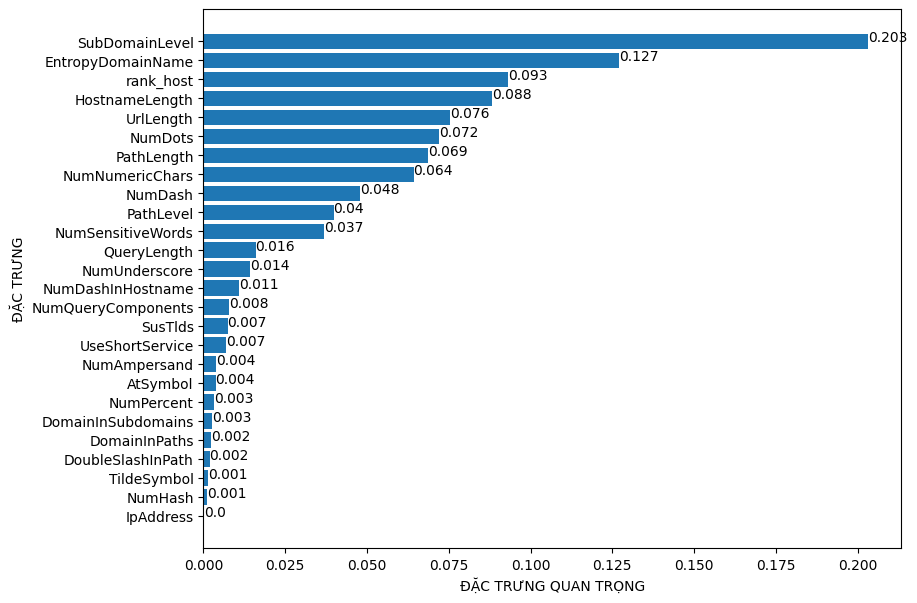

In [34]:
importances = RFC_grid.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (9, 7))

n_features = X_train.shape[1]

plt.barh(range(n_features), importances[indices], align = 'center')

plt.yticks(np.arange(n_features), X_train.columns[indices])
for index, value in enumerate(importances[indices]):
    plt.text(value, index, str(round(value,3)))
plt.xlabel("ĐẶC TRƯNG QUAN TRỌNG")
plt.ylabel("ĐẶC TRƯNG")
plt.show()

In [35]:
storeResults('Random Forest', acc_train, acc_test, f1, recall, precision, 1)

# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(random_state = 100, max_iter = 10000)

params = LR_model.get_params()
params_str = ', '.join(f'{k}={v}' for k, v in params.items())

print(textwrap.fill(params_str, width=70))

C=1.0, class_weight=None, dual=False, fit_intercept=True,
intercept_scaling=1, l1_ratio=None, max_iter=10000, multi_class=auto,
n_jobs=None, penalty=l2, random_state=100, solver=lbfgs, tol=0.0001,
verbose=0, warm_start=False


In [37]:
LR_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=100)


--------------- Logistic Regression ---------------

BÁO CÁO PHÂN LOẠI:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85     28812
           1       0.86      0.83      0.85     28820

    accuracy                           0.85     57632
   macro avg       0.85      0.85      0.85     57632
weighted avg       0.85      0.85      0.85     57632


MA TRẬN NHẦM LẪN:
Train Accuracy:  0.8502251372947086
Test Accuracy:  0.8472549972237646
F1 Score:  0.8452818250522874
Recall:  0.8343858431644691
Precision:  0.8564661466680913


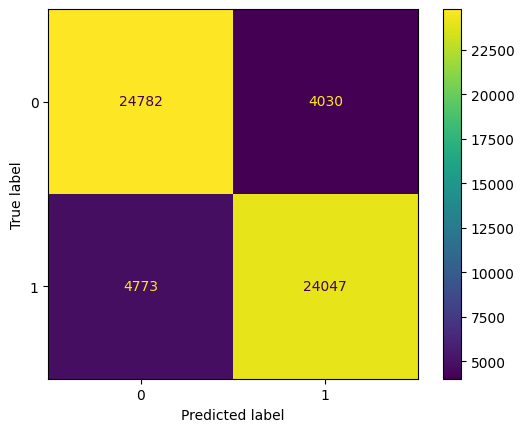

In [38]:
pred_LR_test = LR_model.predict(X_test)

pred_LR_train = LR_model.predict(X_train)

print('\n--------------- Logistic Regression ---------------\n')
print('BÁO CÁO PHÂN LOẠI:\n', classification_report(y_test, pred_LR_test, target_names=['0','1']))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, pred_LR_test),display_labels=['0','1'])
print('\nMA TRẬN NHẦM LẪN:\n',disp.plot())

acc_train = accuracy_score(y_train,pred_LR_train)
acc_test = accuracy_score(y_test,pred_LR_test)
f1 = f1_score(y_test,pred_LR_test)
recall = recall_score(y_test,pred_LR_test)
precision = precision_score(y_test,pred_LR_test)

print("Train Accuracy: ", acc_train)
print("Test Accuracy: ", acc_test)
print("F1 Score: ", f1)
print("Recall: ", recall)
print("Precision: ", precision)

In [39]:
storeResults('Logistic Regression', acc_train, acc_test, f1, recall, precision, 0)

# Gradient Boosting

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

GB_model = GradientBoostingClassifier(random_state = 100)

params = GB_model.get_params()
params_str = ', '.join(f'{k}={v}' for k, v in params.items())

print(textwrap.fill(params_str, width=70))

ccp_alpha=0.0, criterion=friedman_mse, init=None, learning_rate=0.1,
loss=log_loss, max_depth=3, max_features=None, max_leaf_nodes=None,
min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2,
min_weight_fraction_leaf=0.0, n_estimators=100, n_iter_no_change=None,
random_state=100, subsample=1.0, tol=0.0001, validation_fraction=0.1,
verbose=0, warm_start=False


In [41]:
GB_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=100)


--------------- Gradient Boosting ---------------

BÁO CÁO PHÂN LOẠI:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89     28812
           1       0.93      0.83      0.88     28820

    accuracy                           0.88     57632
   macro avg       0.89      0.88      0.88     57632
weighted avg       0.89      0.88      0.88     57632


MA TRẬN NHẦM LẪN:
Train Accuracy:  0.8832409359464876
Test Accuracy:  0.8847515269294837
F1 Score:  0.8780881759113103
Recall:  0.8299791811242193
Precision:  0.9321175278622087


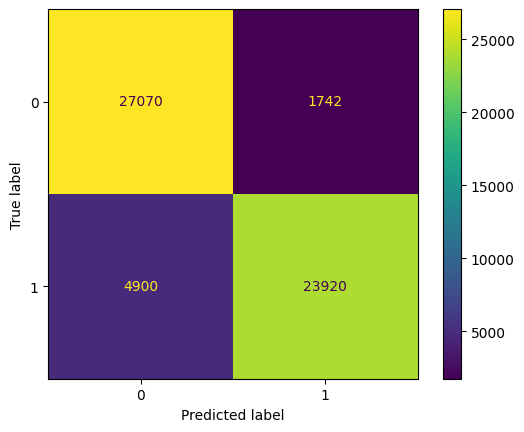

In [42]:
pred_GB_test = GB_model.predict(X_test)

pred_GB_train = GB_model.predict(X_train)

print('\n--------------- Gradient Boosting ---------------\n')
print('BÁO CÁO PHÂN LOẠI:\n', classification_report(y_test, pred_GB_test, target_names=['0','1']))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, pred_GB_test),display_labels=['0','1'])
print('\nMA TRẬN NHẦM LẪN:\n',disp.plot())

acc_train = accuracy_score(y_train,pred_GB_train)
acc_test = accuracy_score(y_test,pred_GB_test)
f1 = f1_score(y_test,pred_GB_test)
recall = recall_score(y_test,pred_GB_test)
precision = precision_score(y_test,pred_GB_test)

print("Train Accuracy: ", acc_train)
print("Test Accuracy: ", acc_test)
print("F1 Score: ", f1)
print("Recall: ", recall)
print("Precision: ", precision)

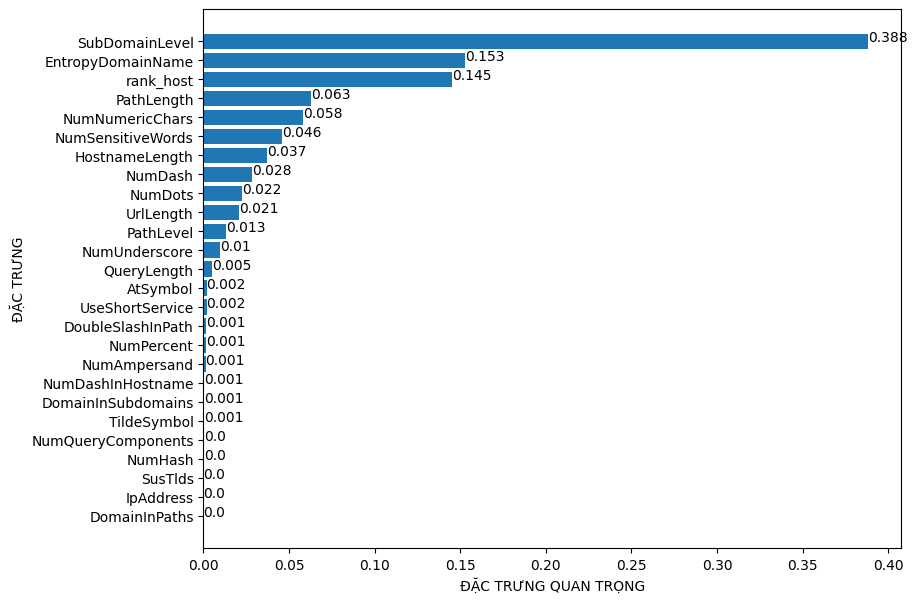

In [43]:
importances = GB_model.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (9, 7))

n_features = X_train.shape[1]

plt.barh(range(n_features), importances[indices], align = 'center')

plt.yticks(np.arange(n_features), X_train.columns[indices])
for index, value in enumerate(importances[indices]):
    plt.text(value, index, str(round(value,3)))
plt.xlabel("ĐẶC TRƯNG QUAN TRỌNG")
plt.ylabel("ĐẶC TRƯNG")
plt.show()

In [44]:
storeResults('Gradient Boosting', acc_train, acc_test, f1, recall, precision, 0)

# XGBoost

In [45]:
import xgboost as xgb

XGB_model = xgb.XGBClassifier(random_state = 100)

params = XGB_model.get_params()
params_str = ', '.join(f'{k}={v}' for k, v in params.items())

print(textwrap.fill(params_str, width=70))

objective=binary:logistic, base_score=None, booster=None,
callbacks=None, colsample_bylevel=None, colsample_bynode=None,
colsample_bytree=None, device=None, early_stopping_rounds=None,
enable_categorical=False, eval_metric=None, feature_types=None,
gamma=None, grow_policy=None, importance_type=None,
interaction_constraints=None, learning_rate=None, max_bin=None,
max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=None,
max_depth=None, max_leaves=None, min_child_weight=None, missing=nan,
monotone_constraints=None, multi_strategy=None, n_estimators=None,
n_jobs=None, num_parallel_tree=None, random_state=100, reg_alpha=None,
reg_lambda=None, sampling_method=None, scale_pos_weight=None,
subsample=None, tree_method=None, validate_parameters=None,
verbosity=None


In [46]:
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=100, ...)


--------------- XGBoost ---------------

BÁO CÁO PHÂN LOẠI:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94     28812
           1       0.95      0.91      0.93     28820

    accuracy                           0.94     57632
   macro avg       0.94      0.94      0.94     57632
weighted avg       0.94      0.94      0.94     57632


MA TRẬN NHẦM LẪN:
Train Accuracy:  0.9399764017941578
Test Accuracy:  0.9353310660744031
F1 Score:  0.9339196113544087
Recall:  0.9138445523941707
Precision:  0.9548964867118669


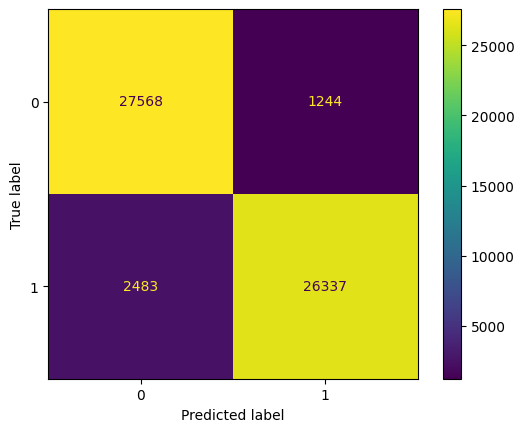

In [47]:
pred_XGB_test = XGB_model.predict(X_test)

pred_XGB_train = XGB_model.predict(X_train)

print('\n--------------- XGBoost ---------------\n')
print('BÁO CÁO PHÂN LOẠI:\n', classification_report(y_test, pred_XGB_test, target_names=['0','1']))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, pred_XGB_test),display_labels=['0','1'])
print('\nMA TRẬN NHẦM LẪN:\n',disp.plot())

acc_train = accuracy_score(y_train,pred_XGB_train)
acc_test = accuracy_score(y_test,pred_XGB_test)
f1 = f1_score(y_test,pred_XGB_test)
recall = recall_score(y_test,pred_XGB_test)
precision = precision_score(y_test,pred_XGB_test)

print("Train Accuracy: ", acc_train)
print("Test Accuracy: ", acc_test)
print("F1 Score: ", f1)
print("Recall: ", recall)
print("Precision: ", precision)

In [48]:
storeResults('XGBoost', acc_train, acc_test, f1, recall, precision, 0)

## Hyperparameter Tuning


In [49]:
# Minimum sum of instance weight (hessian) needed in a child.
min_child_weight = [1, 5]

# Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting.
subsample = [0.5, 1]

# Step size shrinkage used in update to prevents overfitting.
learning_rate = [0.01, 0.1, 0.2]

# the number of trees to be used
n_estimators = [50, 100, 200]

# maximum number of splits each tree can take.
max_depth = [None, 10, 20, 30]

param_grid = {
    'min_child_weight': min_child_weight, 
    'subsample': subsample, 
    'learning_rate': learning_rate,
    'n_estimators': n_estimators,
    'max_depth': max_depth
}

# cv : 3-fold cross validation
# verbose: Controls the verbosity: the higher, the more messages.
grid = GridSearchCV(xgb.XGBClassifier(random_state = 100), param_grid = param_grid, cv = 3,scoring = "accuracy", verbose = 1, n_jobs = -1, return_train_score=True)

In [50]:
# Huấn luyện mô hình với Grid Search.
grid.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=100, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [None, 10, 20, 30],
                         'min_child_weight': [1, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.5, 1]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [51]:
grid.best_params_

{'learning_rate': 0.2,
 'max_depth': 20,
 'min_child_weight': 5,
 'n_estimators': 200,
 'subsample': 1}

In [52]:
XGB_grid = xgb.XGBClassifier(random_state = 100, 
                              max_depth = 20,
                              learning_rate = 0.2,
                              min_child_weight = 5,
                              subsample = 1,
                             n_estimators = 200
                             )

In [53]:
XGB_grid.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=100, ...)


--------------- XGBoost after tuning ---------------

BÁO CÁO PHÂN LOẠI:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     28812
           1       0.97      0.95      0.96     28820

    accuracy                           0.96     57632
   macro avg       0.96      0.96      0.96     57632
weighted avg       0.96      0.96      0.96     57632


MA TRẬN NHẦM LẪN:
Train Accuracy:  0.9875155080121114
Test Accuracy:  0.9582697112715158
F1 Score:  0.9578417795852543
Recall:  0.9479875086745315
Precision:  0.9679030715272612


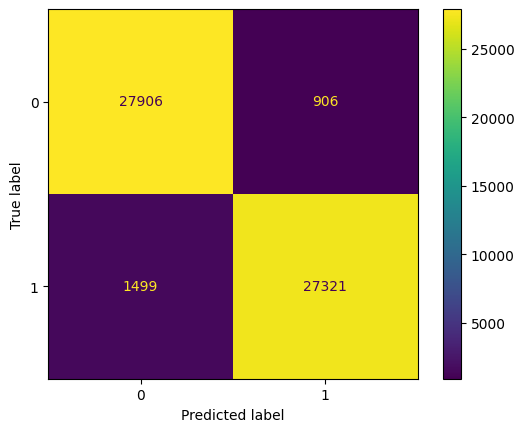

In [54]:
pred_XGB_test = XGB_grid.predict(X_test)

pred_XGB_train = XGB_grid.predict(X_train)

print('\n--------------- XGBoost after tuning ---------------\n')
print('BÁO CÁO PHÂN LOẠI:\n', classification_report(y_test, pred_XGB_test, target_names=['0','1']))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, pred_XGB_test),display_labels=['0','1'])
print('\nMA TRẬN NHẦM LẪN:\n',disp.plot())

acc_train = accuracy_score(y_train,pred_XGB_train)
acc_test = accuracy_score(y_test,pred_XGB_test)
f1 = f1_score(y_test,pred_XGB_test)
recall = recall_score(y_test,pred_XGB_test)
precision = precision_score(y_test,pred_XGB_test)

print("Train Accuracy: ", acc_train)
print("Test Accuracy: ", acc_test)
print("F1 Score: ", f1)
print("Recall: ", recall)
print("Precision: ", precision)

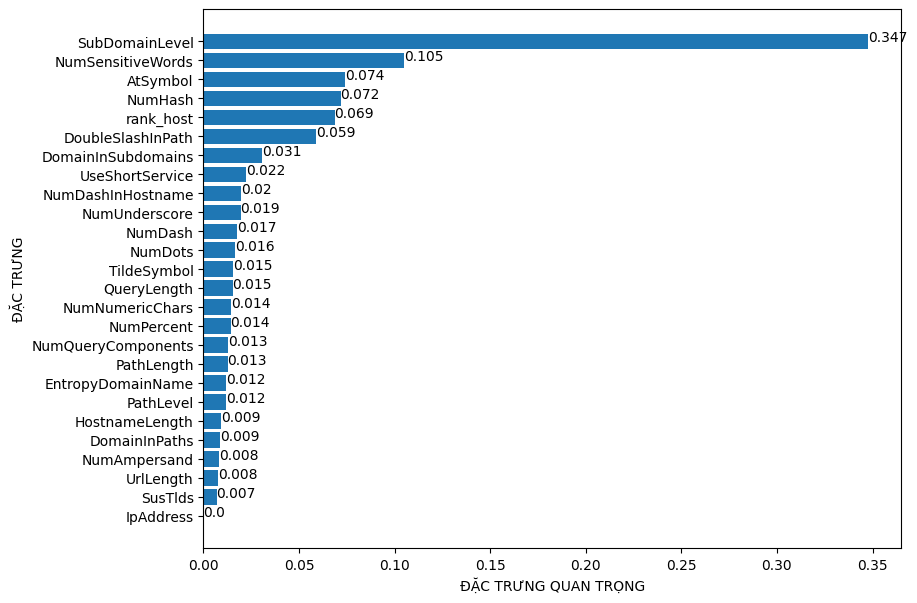

In [55]:
importances = XGB_grid.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (9, 7))

n_features = X_train.shape[1]

plt.barh(range(n_features), importances[indices], align = 'center')

plt.yticks(np.arange(n_features), X_train.columns[indices])
for index, value in enumerate(importances[indices]):
    plt.text(value, index, str(round(value,3)))
plt.xlabel("ĐẶC TRƯNG QUAN TRỌNG")
plt.ylabel("ĐẶC TRƯNG")
plt.show()

In [56]:
storeResults('XGBoost', acc_train, acc_test, f1, recall, precision, 1)

# Evaluation Metrics

In [57]:
ML_model = sort_models(ML_model)
dicts = [obj.__dict__ for obj in ML_model]

df = pd.DataFrame.from_records(dicts)

df['acc_train'] = (df['acc_train'] * 100).round(2).astype(str) + '%'
df['acc_tests'] = (df['acc_tests'] * 100).round(2).astype(str) + '%'
df['f1_score'] = (df['f1_score'] * 100).round(2).astype(str) + '%'
df['recall_score'] = (df['recall_score'] * 100).round(2).astype(str) + '%'
df['precision_score'] = (df['precision_score'] * 100).round(2).astype(str) + '%'

df = df.rename(columns={
    'name': 'MÔ HÌNH',
    'acc_train': 'ĐỘ CHÍNH XÁC TRÊN TẬP HUẤN LUYỆN',
    'acc_tests': 'ĐỘ CHÍNH XÁC TRÊN TẬP KIỂM TRA',
    'f1_score': 'F1 SCORE',
    'recall_score': 'RECALL SCORE',
    'precision_score': 'PRECISION SCORE'
})

df

,MÔ HÌNH,ĐỘ CHÍNH XÁC TRÊN TẬP HUẤN LUYỆN,ĐỘ CHÍNH XÁC TRÊN TẬP KIỂM TRA,F1 SCORE,RECALL SCORE,PRECISION SCORE
0,XGBoost,94.0%,93.5%,93.4%,91.4%,95.5%
1,Random Forest,99.4%,93.4%,93.3%,92.0%,94.6%
2,Decision Tree,99.4%,91.5%,91.4%,90.8%,92.1%
3,Gradient Boosting,88.3%,88.5%,87.8%,83.0%,93.2%
4,Logistic Regression,85.0%,84.7%,84.5%,83.4%,85.6%


In [58]:
ML_top3_model_tuning = sort_models(ML_top3_model_tuning)
dicts = [obj.__dict__ for obj in ML_top3_model_tuning]

df = pd.DataFrame.from_records(dicts)

df['acc_train'] = (df['acc_train'] * 100).round(2).astype(str) + '%'
df['acc_tests'] = (df['acc_tests'] * 100).round(2).astype(str) + '%'
df['f1_score'] = (df['f1_score'] * 100).round(2).astype(str) + '%'
df['recall_score'] = (df['recall_score'] * 100).round(2).astype(str) + '%'
df['precision_score'] = (df['precision_score'] * 100).round(2).astype(str) + '%'

df = df.rename(columns={
    'name': 'MÔ HÌNH',
    'acc_train': 'ĐỘ CHÍNH XÁC TRÊN TẬP HUẤN LUYỆN',
    'acc_tests': 'ĐỘ CHÍNH XÁC TRÊN TẬP KIỂM TRA',
    'f1_score': 'F1 SCORE',
    'recall_score': 'RECALL SCORE',
    'precision_score': 'PRECISION SCORE'
})

df

,MÔ HÌNH,ĐỘ CHÍNH XÁC TRÊN TẬP HUẤN LUYỆN,ĐỘ CHÍNH XÁC TRÊN TẬP KIỂM TRA,F1 SCORE,RECALL SCORE,PRECISION SCORE
0,XGBoost,98.8%,95.8%,95.8%,94.8%,96.8%
1,Random Forest,98.5%,93.6%,93.5%,92.1%,94.8%
2,Decision Tree,96.6%,91.7%,91.6%,90.2%,92.9%


# Test model

In [59]:
class FeatureExtraction:
  def __init__(self):
    pass

  def IpAddress(self, url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        return 1
    else:
        return 0

  def UrlLength(self, url):
    return len(url)

  def HostnameLength(self, url):
    try:
      return len(urlparse(url).hostname)
    except:
      return 0

  def PathLength(self, url):
    try:
        parsed_url = urlparse(url)
        return len(parsed_url.path)
    except:
        return 0

  def QueryLength(self, url):
    try:
        parsed_url = urlparse(url)
        return len(parsed_url.query)
    except:
        return 0

  def UseShortService(self, url):
    #listing shortening services
    shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                          r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                          r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                          r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                          r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                          r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                          r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                          r"tr\.im|link\.zip\.net"

    return 1 if re.search(shortening_services,url) else 0

  def SusTlds(self, url):
    suspicious_tlds = [
      'tk', 'pw', 'info', 'biz', 'xyz', 'top', 'club', 'work', 'online',
      'site', 'website', 'space', 'click', 'link', 'download', 'trade', 'cn'
      'review', 'party', 'win', 'stream', 'gdn', 'racing', 'science', 'net'
      'gq', 'icu', 'ooo', 'mobi', 'fun', 'buzz', 'kim', 'ga', 'cf', 'org', 'ml', 'co', 'ru'
    ]
    try:
      tld = get_tld(url)
      if tld in suspicious_tlds: return 1
      else: return 0
    except:
      return 1

  def NumSensitiveWords(self, url):
    words = ['number', 'update', 'fraud', 'spoof', 'bank', 'banking', 'paypal', 'spoofing', 'credit', 'confirm', 
            'free', 'webscr', 'payment', 'secure', 'PayPal', 'password', 'bonus', 'identity', 'lucky', 'social', 'money', 'account', 
            'transfer', 'ebayisapi', 'keylogger', 'card', 'verify', 'sign in', 'ssn', 'service', 'signin', 'login']
    word_count = sum(url.count(word) for word in words)
    return word_count

  def NumNumericChars(self, url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits += 1
    return digits

  def NumDots(self, url):
    return url.count('.')

  def NumDash(self, url):
    return url.count('-')

  def NumDashInHostname(self, url):
    try:
        url_info = tldextract.extract(url)
        hostname = url_info.domain
        return hostname.count('-')
    except:
        return 0
    
  def NumUnderscore(self, url):
    return url.count('_')

  def NumPercent(self, url):
    return url.count("%")

  def NumAmpersand(self, url):
    return url.count("&")

  def NumHash(self, url):
    return url.count("#")

  def NumQueryComponents(self, url):
    try:
        parsed_url = urlparse(url)
        return len(parsed_url.query.split('&')) if parsed_url.query else 0
    except:
        return 0
    
  def AtSymbol(self, url):
    return 1 if "@" in url else 0

  def TildeSymbol(self, url):
    return 1 if "~" in url else 0

  def DoubleSlashInPath(self, url):
    pos = url.rfind('//')
    if pos > 6:
      return 1 if pos > 7 else 0
    return 0

  def SubDomainLevel(self, url):
    try:
        url_info = tldextract.extract(url)
        subdomain = url_info.subdomain
        if subdomain:
            return subdomain.count('.') + 1
        else:
            return 0
    except:
        return 0

  def PathLevel(self, url):
    try:
        parsed_url = urlparse(url)
        if parsed_url.path:
            return parsed_url.path.count('/') + 1
        else:
            return 0
    except:
        return 0

  def DomainInSubdomains(self, url):
    try:
        url_info = tldextract.extract(url)
        tld = get_tld(url, fail_silently=True)
        if tld:
            return 1 if tld in url_info.subdomain else 0
        else:
            return 1
    except:
        return 1

  def DomainInPaths(self, url):
    try:
        parsed_url = urlparse(url)
        tld = get_tld(url, fail_silently=True)
        if tld:
            return 1 if tld in parsed_url.path else 0
        else:
            return 1
    except:
        return 1

  def EntropyDomainName(self, url):
    try:
        hostname = urlparse(url).netloc
        counter = Counter(hostname)
        probabilities = [count / len(hostname) for count in counter.values()]
        return -sum(p * math.log2(p) for p in probabilities)
    except:
        return 0
    
  def rank_host(self, url):
    try:
        domain = tldextract.extract(url).registered_domain
        return 0 if domain in alexa_domains else 1
    except Exception:
        return 1
  

In [60]:
def main(url):
    feature = FeatureExtraction()
    status_df = pd.DataFrame({'url': [url]})

    for func_name in dir(FeatureExtraction):
        if not func_name.startswith('__') and callable(getattr(FeatureExtraction, func_name)):
            status_df[func_name] = status_df['url'].apply(getattr(feature, func_name))

    status_df.drop(columns=['url'], inplace=True)
    test = pd.DataFrame(status_df, columns=status_df.columns)
    return test

In [61]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)

    pred = RFC_grid.predict(features_test)
    return int(pred[0]) # 1 là độc hại

In [62]:
response = requests.get('https://openphish.com/feed.txt')
response.raise_for_status()  # Raise an exception if the request was unsuccessful
urls = response.text.splitlines()

cnt = 0
for url in urls:
  if get_prediction_from_url(url) == 1: cnt += 1

    
print(cnt / len(urls))

0.886


In [63]:
url_ats = ["https://colab.research.google.com/drive/1_iX6qDpqh0FsqFMzRF42iwBg21UXy0xR?authuser=1#scrollTo=1ianw5UonSXv", "https://github.com/vaibhavbichave/Phishing-URL-Detection/blob/master/Phishing%20URL%20Detection.ipynb", "https://github.com/shreyagopal/Phishing-Website-Detection-by-Machine-Learning-Techniques/blob/master/Phishing%20Website%20Detection_Models%20%26%20Training.ipynb", "https://vncoder.vn/bai-hoc/histogram-507", "https://www.youtube.com/watch?v=a4jzMCXkQ0U&t=2384s", "https://www.facebook.com/", "https://github.com/huggingface", "https://www.youtube.com/", "https://huggingface.co/", "https://en.wikipedia.org/wiki/Main_Page", "https://www.youtube.com/watch?v=Ikub5DUp0WA", "https://www.kaggle.com/code/vantien03/url-detector/edit", "https://www.facebook.com/vantien.pham.1042", "https://drive.google.com/", "https://github.com/bregman-arie/devops-exercises?fbclid=IwAR2spB1fdIvEez9X243llhIRob85aGb3rSupkoU9TLGR2o-GaepkvMJxlZs", "https://portal.ptit.edu.vn/", "https://outlook.office.com/mail/inbox", "https://daotao.ptit.edu.vn/#", "https://portal.ptit.edu.vn/giaovu/", "https://viblo.asia/p/quy-trinh-lam-viec-chuan-chi-voi-git-eW65G10RZDO", "https://www.figma.com/community/plugin/1264600219316901594/vector-to-3d", "https://app.durable.co/website-builder", "https://qldt.ptit.edu.vn/default.aspx?page=gioithieu", "https://thinhnotes.com/chuyen-nghe-ba/use-case-diagram-va-5-sai-lam-thuong-gap/", "https://softwaredesign.home.blog/tutorials/hotel-reservation-management-application/?fbclid=IwAR1BMTR6Kobs5u__qhbB9tvV_hZG7HslsexNhuSIopfb4JnmWhqCHbxUulE", "https://mvnrepository.com/", "https://openui.fly.dev/ai/o81amTu3VjycJk4OdfPcS", "https://code.ptit.edu.vn/", "https://code.ptit.edu.vn/login", "https://dsec.ptit.edu.vn/login", "https://code.ptit.edu.vn/student/question", "https://chat.zalo.me/", "https://www.google.com/", "https://www.facebook.com/", "https://www.youtube.com/", "https://www.msn.com/vi-vn/entertainment/news/t%C3%A1c-gi%E1%BA%A3-7-vi%C3%AAn-ng%E1%BB%8Dc-r%E1%BB%93ng-qua-%C4%91%E1%BB%9Di/ar-BB1jwPrT?ocid=msedgntp&pc=CNNDDB&cvid=48828957fcaa41708e6522f501b09dbc&ei=16"] 

cnt = 0
for url in url_ats:
  if get_prediction_from_url(url) == 0: cnt += 1

print(cnt / len(url_ats))

0.5833333333333334


In [64]:
a = "https://chat.zalo.me/"
print(get_prediction_from_url(a))

0


# Save Model RandomForest

In [65]:
import pickle
with open('URL_Classifier.pkl', 'wb') as file:  
    pickle.dump(RFC_grid, file)

In [66]:
with open('/kaggle/working/URL_Classifier.pkl', 'rb') as file:  
    RFC_Model = pickle.load(file)

RFC_Model

RandomForestClassifier(criterion='entropy', min_samples_split=5,
                       n_estimators=200, random_state=100)